Import libraries

In [221]:
import math
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit.opflow import X, Y, Z, I, CircuitStateFn
from qiskit.visualization import plot_histogram
pi = math.pi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerTuple
from scipy.optimize import curve_fit

Calculation of variational ground state energies $E_1$ and $E_2$ and fit for $E_N$

Lowest trial energy for N=1:  -0.43658172314753635 MeV
Lowest trial energy for N=2:  -1.7491336040155565 MeV


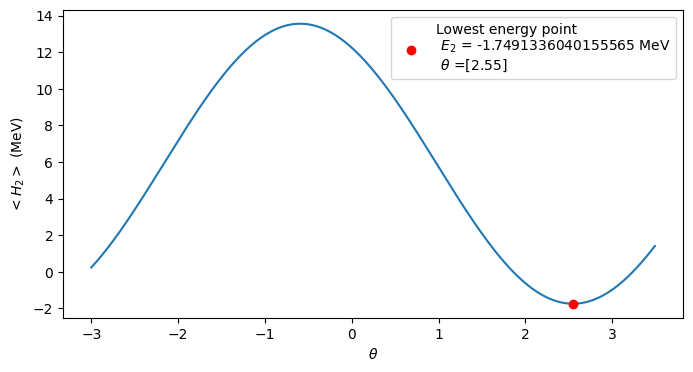

In [222]:
# Define deuterion Hamiltonian in the computational basis
Hamilt_1 = (0.218291 * Z^I) - (0.218291 * I^I)
Hamilt_2 = (5.906709 * I^I) + (0.218291 * Z^I) - (6.125 * I^Z) - (2.143304 * X^X) - (2.143304 * Y^Y)

# Deuteron parameters
m = 1875.6 # MeV / c^2
hbar_c = 197.326980 # Mev fm
c = 2.99792458e+23 # fm /s
omega = c* 7.0/hbar_c

# Loop over variational parameter theta
theta = np.arange(-3,+3.5,0.01)
exp_val_1 = np.empty(len(theta))
exp_val_2 = np.empty(len(theta))
for kk in range(0, len(theta)):
    # Create a Quantum Circuit acting on the q register, default both in the state |0>
    circuit = QuantumCircuit(2)

    # Add X gate to qubit 0
    circuit.x(0)

    # Rotation around y axis on qubit 1
    circuit.ry(theta[kk], 1)

    # Add CNOT, control q1, target q0
    circuit.cx(1,0)

    # Initialize state
    state= Statevector.from_int(0, 4)

    # Evolve the state by the quantum circuit
    state = state.evolve(circuit)

    exp_val_1[kk]=state.expectation_value(Hamilt_1).real
    exp_val_2[kk]=state.expectation_value(Hamilt_2).real

# Lowest trial energies
E_1 =  min(exp_val_1)
E_2 = min(exp_val_2)

# Map the quantum measurement to the classical bits
#circuit.measure([0, 1], [0, 1])

# Compile the circuit for the support instruction set (basis_gates)
# and topology (coupling_map) of the backend
#compiled_circuit = transpile(circuit, simulator)

# Execute the circuit on the aer simulator
#job = simulator.run(compiled_circuit, shots=10000)

# Grab results from the job
#result = job.result()

# Returns counts
#counts = result.get_counts(compiled_circuit)
#print("\nTotal count for 00 and 11 are:", counts)


# Draw the circuit
#circuit.draw('mpl')

# Plot style options
w = 8
h = 4
fontsize = 12
cmap = plt.get_cmap('tab20')

# <H_1>(theta)
#lbl = 'Lowest energy point\n $E_1$ = ' + str(E_1) + ' MeV\n $\\theta$ =' + str(theta[np.where(exp_val_1 == E_1)])
#plt.figure(figsize=(w,h))
#plt.plot(theta, exp_val_1)
#plt.scatter(theta[np.where(exp_val_1 == E_1)], E_1, zorder= 5, color='red', label = lbl )
#plt.legend()
#plt.xlabel("$\\theta$")
#plt.ylabel("$<H_1>$ (MeV)")

# <H_2>(theta)
lbl = 'Lowest energy point\n $E_2$ = ' + str(E_2) + ' MeV\n $\\theta$ =' + str(theta[np.where(exp_val_2 == E_2)])
plt.figure(figsize=(w,h))
plt.plot(theta, exp_val_2)
plt.scatter(theta[np.where(exp_val_2 == E_2)], E_2, zorder= 5, color='red', label = lbl )
plt.legend()
plt.xlabel("$\\theta$")
plt.ylabel("$<H_2>$ (MeV)")



print('Lowest trial energy for N=1: ', E_1, 'MeV')
print('Lowest trial energy for N=2: ', E_2, 'MeV')


In [223]:
# List of trial energies
E_data = np.array([E_1 , E_2])

# Effective hard-wall radius for N=1 and N=2
L = np.array([9.14, 11.45])  # fm

# Harmonic oscillator variant of Lüscher formula
def E_N_func(x, k, gamma):
    return -hbar_c*hbar_c*k*k/(2*m)*(1 - 2*gamma*gamma*np.exp(-2*k*x)/k - 4*(gamma**4)*x*np.exp(-4*k*x)/k)

# Fit to k and gamma
param, cov = curve_fit(E_N_func, L, E_data)

# Results
print('Fit parameters [k gamma]=', param)
print('Infinite-basis extrapolated binding energy: ', -hbar_c*hbar_c*param[0]*param[0]/(2*m), 'MeV')

Fit parameters [k gamma]= [ 0.42297873 12.68951495]
Infinite-basis extrapolated binding energy:  -1.8571191487819085 MeV
